# Energy - Using Locust

Study the impact of different M3 images on energy consumption.

Generate 4 load profiles (1, 10, 20, 50 clients) to compare the energy consumption of firmwares (contikimac, tsch and nullrdc).

In [1]:
import os
cur_dir=os.getcwd() # save current directory to save the generated CSV files

%cd ../../..
%pwd

/home/jovyan/work


'/home/jovyan/work'

## Description

Detailing the parameters used in the different experiment runs.

In [2]:
import pandas
import io
import uuid
import datetime

experiments=io.StringIO("""
firmware,iotlab_nodes,g5k_nodes,duration,users
contikimac,4,1,300,1
contikimac,4,1,300,10
contikimac,4,1,300,20
contikimac,4,1,300,50
tsch,4,1,300,1
tsch,4,1,300,10
tsch,4,1,300,20
tsch,4,1,300,50
nullrdc,4,1,300,1
nullrdc,4,1,300,10
nullrdc,4,1,300,20
nullrdc,4,1,300,50
""")

job_name="rsd-hackathon"
# number of runs
N=2

df = pandas.read_csv(experiments)
# repeat N times each test
df = pandas.concat([df.assign(run=i) for i in range(0,N)], ignore_index=True)

df['exp_id'] = [str(uuid.uuid4()) for _,_ in df.iterrows()]
df['date'] = str(datetime.date.today())
df['data_dir'] = ["data/raw/%s/%s" % (i['date'], i['exp_id']) for _,i in df.iterrows()]
df['notebook_dir'] = ["%s/%s" % (cur_dir, i['exp_id']) for _,i in df.iterrows()]
df['state'] = 'created'

df = df.sample(frac=1).reset_index(drop=True) # randomize test execution
df.to_csv("%s/experiment.csv" % cur_dir)

df

firmware  iotlab_nodes  g5k_nodes  duration  users  run  \
0      nullrdc             4          1       300     50    1   
1   contikimac             4          1       300     10    1   
2   contikimac             4          1       300     20    1   
3   contikimac             4          1       300      1    1   
4      nullrdc             4          1       300     20    0   
5      nullrdc             4          1       300     20    1   
6         tsch             4          1       300      1    0   
7         tsch             4          1       300     20    0   
8      nullrdc             4          1       300      1    0   
9         tsch             4          1       300     10    0   
10        tsch             4          1       300     50    1   
11        tsch             4          1       300      1    1   
12     nullrdc             4          1       300      1    1   
13  contikimac             4          1       300     50    0   
14        tsch             4          1       300     20    1   
15  contikimac             4          1       300     50    1   
16        tsch             4          1       300     50    0   
17     nullrdc             4          1       300     50    0   
18  contikimac             4          1       300      1    0   
19        tsch             4          1       300     10    1   
20  contikimac             4          1       300     20    0   
21     nullrdc             4          1       300     10    1   
22  contikimac             4          1       300     10    0   
23     nullrdc             4          1       300     10    0   

                                  exp_id        date  \
0   110d0968-441b-4e0e-ab6a-f8a205d2e9e4  2021-09-29   
1   41fc862d-2a51-4af1-810e-4ddd581595a6  2021-09-29   
2   988e1d11-2dd1-4750-8c6a-056286af77ec  2021-09-29   
3   51201f5d-45a9-4a9b-97b9-51992fd09a95  2021-09-29   
4   09c7b0cb-b7f0-4f1d-8537-2872795f3306  2021-09-29   
5   ff31e769-32d6-4514-b528-9142c0210974  2021-09-29   
6   99829426-65a6-41b6-ae45-59b25b621e96  2021-09-29   
7   e66159e2-f47d-4cc1-bb74-610a3a031953  2021-09-29   
8   0bbc1054-43fd-4a71-a762-fe3676040a12  2021-09-29   
9   64e43bd3-89c5-4fd6-9ae8-1e505afac0db  2021-09-29   
10  143b8671-b414-4780-aaf1-1ae8f629cce8  2021-09-29   
11  286e77c0-5091-4b0e-a779-a29bf82e6e2e  2021-09-29   
12  2bae298e-ce67-497d-948c-45ff7fa98127  2021-09-29   
13  9f768aca-48a6-4ae7-b7c7-85a98da937e5  2021-09-29   
14  d0b20657-c154-46fa-884a-f45cea57bdfb  2021-09-29   
15  462831c4-8c15-4259-903b-c7ba2a920ace  2021-09-29   
16  2b9df828-20c5-4dfc-8407-6fce35752b76  2021-09-29   
17  fce5c7cf-ed90-449a-a34b-c20cd2e8afe9  2021-09-29   
18  470b0be4-b34d-4104-a48a-8346b81a1d5e  2021-09-29   
19  1f2037df-b44f-48f4-a09d-8d0d15e1f900  2021-09-29   
20  35570877-be3e-4052-a11b-b1fb442bb8db  2021-09-29   
21  6821499a-4b01-457e-8cef-ea6143a79540  2021-09-29   
22  10f3ad45-acc7-41ba-8bf1-53d1b0b81284  2021-09-29   
23  0858fbe3-4cc1-4e64-8242-063df7ed9778  2021-09-29   

                                             data_dir  \
0   data/raw/2021-09-29/110d0968-441b-4e0e-ab6a-f8...   
1   data/raw/2021-09-29/41fc862d-2a51-4af1-810e-4d...   
2   data/raw/2021-09-29/988e1d11-2dd1-4750-8c6a-05...   
3   data/raw/2021-09-29/51201f5d-45a9-4a9b-97b9-51...   
4   data/raw/2021-09-29/09c7b0cb-b7f0-4f1d-8537-28...   
5   data/raw/2021-09-29/ff31e769-32d6-4514-b528-91...   
6   data/raw/2021-09-29/99829426-65a6-41b6-ae45-59...   
7   data/raw/2021-09-29/e66159e2-f47d-4cc1-bb74-61...   
8   data/raw/2021-09-29/0bbc1054-43fd-4a71-a762-fe...   
9   data/raw/2021-09-29/64e43bd3-89c5-4fd6-9ae8-1e...   
10  data/raw/2021-09-29/143b8671-b414-4780-aaf1-1a...   
11  data/raw/2021-09-29/286e77c0-5091-4b0e-a779-a2...   
12  data/raw/2021-09-29/2bae298e-ce67-497d-948c-45...   
13  data/raw/2021-09-29/9f768aca-48a6-4ae7-b7c7-85...   
14  data/raw/2021-09-29/d0b20657-c154-46fa-884a-f4...   
15  data/raw/2021-09-29/462831c4-8c15-4259-903b-c7...   
16  data/r

## Running

In [37]:
import papermill as pm
import pathlib
import pandas

# read the description of the experiment
df = pandas.read_csv("%s/experiment.csv" % cur_dir)
for index, exp in df.iterrows():
    if exp['state'] != 'created':
        continue

    print("Running experiment number: %d, ID: %s, firmware: %s, users %d" % (index, exp['exp_id'], exp['firmware'], exp['users']))
    pathlib.Path(exp['notebook_dir']).mkdir(exist_ok=True, parents=True)

    pm.execute_notebook(
        'analysis/05-locust/05-locust-g5k-iotlab.ipynb',
        '%s/08-energy-locust-%s-%f-%s.ipynb' % (exp['notebook_dir'], exp['firmware'], exp['users'], exp['exp_id']),
        cwd = "analysis/05-locust",  # going back to folder to execute notebook
        parameters = dict(
            output_dir = exp['data_dir'],
            er_image = "data/firmware/custom/%s/er-example-server.iotlab-m3" % exp['firmware'],
            br_image = "data/firmware/custom/%s/border-router.iotlab-m3" % exp['firmware'],
            free_resources = False if index < len(df.index) - 1 else True, #free resources in last experiment
            duration = exp['duration'],
            users = exp['users'],
            iotlab_nodes = exp['iotlab_nodes'],
            iotlab_site = 'grenoble',
            g5k_nodes = exp['g5k_nodes'],
        )
    )
    # change and save new state
    df.at[index, 'state'] = 'executed'
    df.to_csv("%s/experiment.csv" % cur_dir)


Running experiment number: 17, ID: fce5c7cf-ed90-449a-a34b-c20cd2e8afe9, firmware: nullrdc, users 50


Executing:   0%|          | 0/63 [00:00<?, ?cell/s]

Running experiment number: 18, ID: 470b0be4-b34d-4104-a48a-8346b81a1d5e, firmware: contikimac, users 1


Executing:   0%|          | 0/63 [00:00<?, ?cell/s]

Running experiment number: 19, ID: 1f2037df-b44f-48f4-a09d-8d0d15e1f900, firmware: tsch, users 10


Executing:   0%|          | 0/63 [00:00<?, ?cell/s]

Running experiment number: 20, ID: 35570877-be3e-4052-a11b-b1fb442bb8db, firmware: contikimac, users 20


Executing:   0%|          | 0/63 [00:00<?, ?cell/s]

Running experiment number: 21, ID: 6821499a-4b01-457e-8cef-ea6143a79540, firmware: nullrdc, users 10


Executing:   0%|          | 0/63 [00:00<?, ?cell/s]

Running experiment number: 22, ID: 10f3ad45-acc7-41ba-8bf1-53d1b0b81284, firmware: contikimac, users 10


Executing:   0%|          | 0/63 [00:00<?, ?cell/s]

Running experiment number: 23, ID: 0858fbe3-4cc1-4e64-8242-063df7ed9778, firmware: nullrdc, users 10


Executing:   0%|          | 0/63 [00:00<?, ?cell/s]

Parse and save results.

In [38]:
import pandas
import os.path

# where to save the results from experiment
results_filename = "%s/results.csv" % cur_dir
out = None
results_full_filename = "%s/results_full.csv" % cur_dir
out_full = None
energy_filename = "%s/energy_results.csv" % cur_dir
out_energy = None

# read the description of the experiment
df = pandas.read_csv("%s/experiment.csv" % cur_dir)
for index, exp in df.iterrows():
    if exp['state'] != 'executed':
        continue

    # read and save output of this test
    temp = pandas.read_csv(exp['data_dir'] + "/enoslib_stats.csv")
    temp['exp_id'] = exp['exp_id']
    temp['users'] = exp['users']
    temp['run'] = exp['run']
    temp['firmware'] = exp['firmware']        
    out = pandas.concat([out, temp])
    
    temp = pandas.read_csv(exp['data_dir'] + "/enoslib_stats_history.csv")
    temp['exp_id'] = exp['exp_id']
    temp['users'] = exp['users']
    temp['run'] = exp['run']
    temp['firmware'] = exp['firmware']        
    out_full = pandas.concat([out_full, temp])
    
    energy = pandas.read_csv(exp['data_dir'] + "/energy.csv")
    energy['exp_id'] = exp['exp_id']
    energy['users'] = exp['users']
    energy['run'] = exp['run']    
    energy['firmware'] = exp['firmware']
    out_energy = pandas.concat([out_energy, energy])
    out_energy.to_csv(energy_filename)

    
out.to_csv(results_filename)
out_full.to_csv(results_full_filename)
out_energy.to_csv(energy_filename)


## Analysis

### Energy

Read the dataframe with the results of all experiments

In [39]:
%load_ext rpy2.ipython
import pandas

out = pandas.read_csv("%s/energy_results.csv" % cur_dir)
out

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Unnamed: 0  Unnamed: 0.1     timestamp         type    num  \
0                0          1731  1.632924e+09  consumption   1732   
1                1          1732  1.632924e+09  consumption   1733   
2                2          1733  1.632924e+09  consumption   1734   
3                3          1734  1.632924e+09  consumption   1735   
4                4          1735  1.632924e+09  consumption   1736   
...            ...           ...           ...          ...    ...   
326531       13597         46875  1.632998e+09  consumption  46876   
326532       13598         46876  1.632998e+09  consumption  46877   
326533       13599         46877  1.632998e+09  consumption  46878   
326534       13600         46878  1.632998e+09  consumption  46879   
326535       13601         46879  1.632998e+09  consumption  46880   

               t_s    t_us     power  voltage   current   node  \
0       1632924376   65583  0.181985  3.22250  0.056457  m3_16   
1       1632924376  131402  0.181985  3.22250  0.056471  m3_16   
2       1632924376  197220  0.181985  3.22250  0.056452  m3_16   
3       1632924376  263039  0.182107  3.22250  0.056491  m3_16   
4       1632924376  328858  0.181985  3.22250  0.056481  m3_16   
...            ...     ...       ...      ...       ...    ...   
326531  1632998370  504397  0.185160  3.27000  0.056594  m3_18   
326532  1632998370  570185  0.184916  3.27125  0.056530  m3_18   
326533  1632998370  635943  0.185038  3.27000  0.056584  m3_18   
326534  1632998370  701700  0.184550  3.27125  0.056398  m3_18   
326535  1632998370  767489  0.184672  3.27000  0.056457  m3_18   

                                      exp_id  users  run firmware  
0       110d0968-441b-4e0e-ab6a-f8a205d2e9e4     50    1  nullrdc  
1       110d0968-441b-4e0e-ab6a-f8a205d2e9e4     50    1  nullrdc  
2       110d0968-441b-4e0e-ab6a-f8a205d2e9e4     50    1  nullrdc  
3       110d0968-441b-4e0e-ab6a-f8a205d2e9e4     50    1  nullrdc  
4       110d0968-441b-4e0e-ab6a-f8a205d2e9e4     50    1  nullrdc  
...                                      ...    ...  ...      ...  
326531  0858fbe3-4cc1-4e64-8242-063df7ed9778     10    0  nullrdc  
326532  0858fbe3-4cc1-4e64-8242-063df7ed9778     10    0  nullrdc  
326533  0858fbe3-4cc1-4e64-8242-063df7ed9778     10    0  nullrdc  
326534  0858fbe3-4cc1-4e64-8242-063df7ed9778     10    0  nullrdc  
326535  0858fbe3-4cc1-4e64-8242-063df7ed9778     10    0  nullrdc  

[326536 rows x 15 columns]

#### Power

Comparing firmwares.

`summarise()` has grouped output by 'firmware', 'users'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'firmware'. You can override using the `.groups` argument.


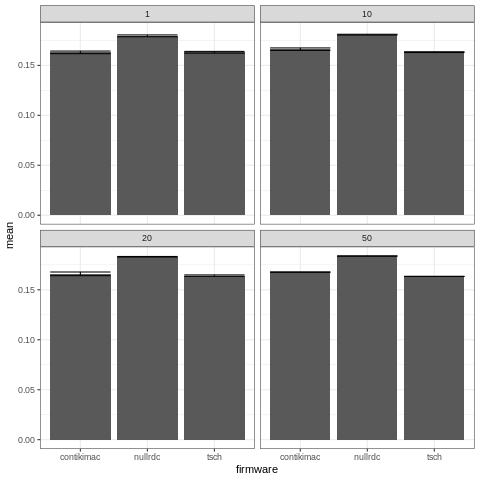

In [40]:
%%R -i out
library(ggplot2)
library(dplyr)

out %>% group_by(firmware, users, run) %>% summarize(mean_power = mean(power)) %>%
    group_by(firmware, users) %>% summarize(mean = mean(mean_power), sd = sd(mean_power), se = sd/sqrt(n())) %>%
ggplot(aes(x=firmware, y=mean)) + geom_col() +
    geom_errorbar(aes(ymin=mean - 2*se, ymax= mean + 2*se)) +
    facet_wrap(~users) + theme_bw()

Comparing load.

`summarise()` has grouped output by 'firmware', 'users'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'firmware'. You can override using the `.groups` argument.


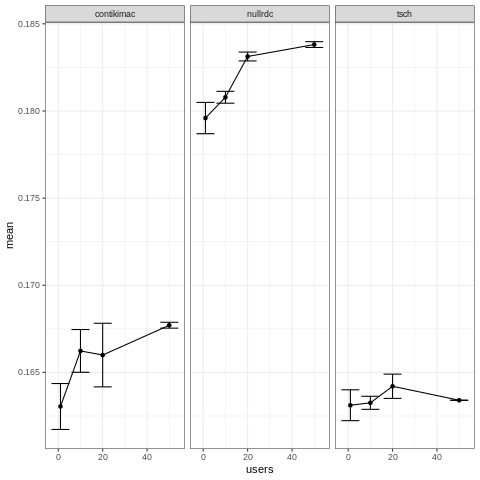

In [41]:
%%R -i out

out %>% group_by(firmware, users, run) %>% summarize(mean_power = mean(power)) %>%
    group_by(firmware, users) %>% summarize(mean = mean(mean_power), sd = sd(mean_power), se = sd/sqrt(n())) %>%
ggplot(aes(x=users, y=mean)) + geom_point() + geom_line() +
    geom_errorbar(aes(ymin=mean - 2*se, ymax= mean + 2*se)) +
    facet_wrap(~firmware) + theme_bw()

#### Voltage

`summarise()` has grouped output by 'firmware', 'users'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'firmware'. You can override using the `.groups` argument.


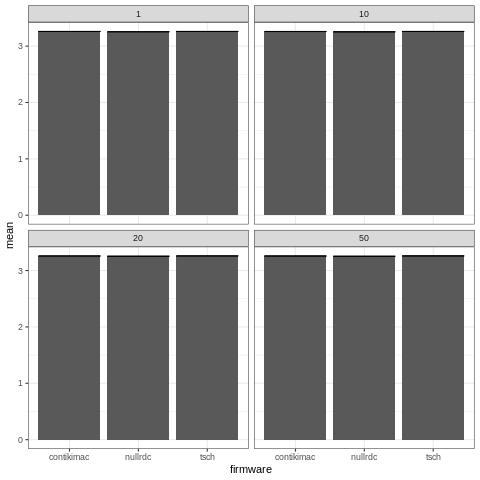

In [42]:
%%R -i out

out %>% group_by(firmware, users, run) %>% summarize(mean_voltage = mean(voltage)) %>%
    group_by(firmware, users) %>% summarize(mean = mean(mean_voltage), sd = sd(mean_voltage), se = sd/sqrt(n())) %>%
ggplot(aes(x=firmware, y=mean)) + geom_col() +
    geom_errorbar(aes(ymin=mean - 2*se, ymax= mean + 2*se)) +
    facet_wrap(~users) + theme_bw()

#### Current

`summarise()` has grouped output by 'firmware', 'users'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'firmware'. You can override using the `.groups` argument.


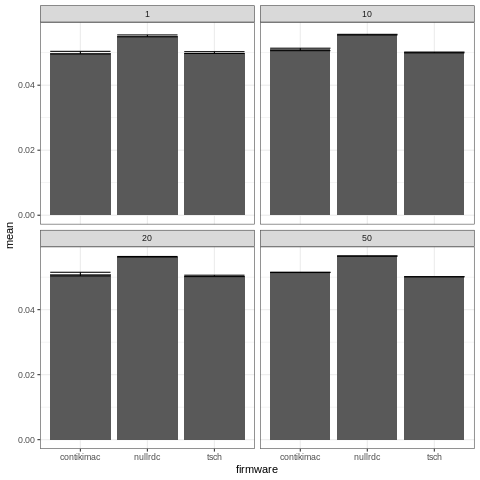

In [43]:
%%R -i out

out %>% group_by(firmware, users, run) %>% summarize(mean_current = mean(current)) %>%
    group_by(firmware, users) %>% summarize(mean = mean(mean_current), sd = sd(mean_current), se = sd/sqrt(n())) %>%
ggplot(aes(x=firmware, y=mean)) + geom_col() +
    geom_errorbar(aes(ymin=mean - 2*se, ymax= mean + 2*se)) +
    facet_wrap(~users) + theme_bw()

`summarise()` has grouped output by 'firmware', 'users'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'firmware'. You can override using the `.groups` argument.


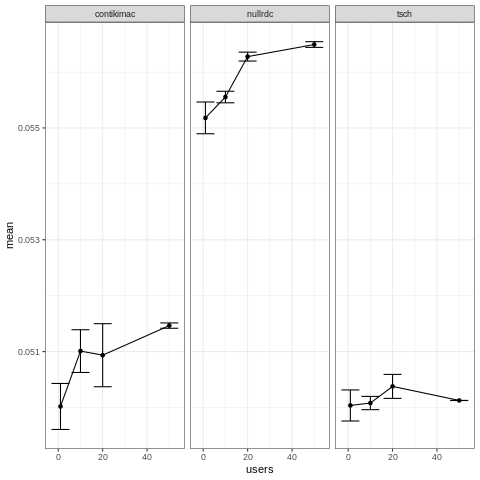

In [44]:
%%R -i out

out %>% group_by(firmware, users, run) %>% summarize(mean_current = mean(current)) %>%
    group_by(firmware, users) %>% summarize(mean = mean(mean_current), sd = sd(mean_current), se = sd/sqrt(n())) %>%
ggplot(aes(x=users, y=mean)) + geom_point() + geom_line() +
    geom_errorbar(aes(ymin=mean - 2*se, ymax= mean + 2*se)) +
    facet_wrap(~firmware) + theme_bw()

### Response time

In [45]:
%load_ext rpy2.ipython
import pandas

out = pandas.read_csv("%s/results.csv" % cur_dir)
out

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Unnamed: 0        Type                                           Name  \
0            0  coapclient  [2001:660:5307:3142::a172]:5683/sensors/gyros   
1            1  coapclient  [2001:660:5307:3142::a269]:5683/sensors/gyros   
2            2  coapclient  [2001:660:5307:3142::b679]:5683/sensors/gyros   
3            3         NaN                                     Aggregated   
4            0  coapclient  [2001:660:5307:3142::a172]:5683/sensors/gyros   
..         ...         ...                                            ...   
79           3         NaN                                     Aggregated   
80           0  coapclient  [2001:660:5307:3142::a172]:5683/sensors/gyros   
81           1  coapclient  [2001:660:5307:3142::a269]:5683/sensors/gyros   
82           2  coapclient  [2001:660:5307:3142::b679]:5683/sensors/gyros   
83           3         NaN                                     Aggregated   

    Request Count  Failure Count  Median Response Time  Average Response Time  \
0            1824              0                    90             815.729167   
1            2961              0                    90             875.275583   
2            2633              0                    89             873.156476   
3            7418              0                    90             859.881639   
4             806              0                    90             108.847395   
..            ...            ...                   ...                    ...   
79           2672              0                    87             106.345808   
80            837              0                    61              63.965352   
81            833              0                    61              63.507803   
82           1110              0                    61              63.730631   
83           2780              0                    61              63.734532   

    Min Response Time  Max Response Time  Average Content Size  ...   95%  \
0                  49              79772                   0.0  ...  3000   
1                  60              88066                   0.0  ...  2900   
2                  60              86626                   0.0  ...  2900   
3                  49              88066                   0.0  ...  3000   
4                  75               2788                   0.0  ...   160   
..                ...                ...                   ...  ...   ...   
79                 74               3056                   0.0  ...   160   
80                 52                106                   0.0  ...   100   
81                 60                107                   0.0  ...    80   
82                 59                108                   0.0  ...    84   
83                 52                108                   0.0  ...    92   

     98%    99%  99.9%  99.99%   100%                                exp_id  \
0   8000   8900  65000   80000  80000  110d0968-441b-4e0e-ab6a-f8a205d2e9e4   
1   7900  14000  74000   88000  88000  110d0968-441b-4e0e-ab6a-f8a205d2e9e4   
2   7800   8700  79000   87000  87000  110d0968-441b-4e0e-ab6a-f8a205d2e9e4   
3   7900   8900  76000   88000  88000  110d0968-441b-4e0e-ab6a-f8a205d2e9e4   
4    190    260   2800    2800   2800  41fc862d-2a51-4af1-810e-4ddd581595a6   
..   ...    ...    ...     ...    ...                                   ...   
79   210    290   2700    3100   3100  10f3ad45-acc7-41ba-8bf1-53d1b0b81284   
80   100    100    110     110    110  0858fbe3-4cc1-4e64-8242-063df7ed9778   
81   100    100    110     110    110  0858fbe3-4cc1-4e64-8242-063df7ed9778   
82   100    100    110     110    110  0858fbe3-4cc1-4e64-8242-063df7ed9778   
83   100    100    110     110    110  0858fbe3-4cc1-4e64-8242-063df7ed9778   

    users  run    firmware  
0      50    1     nullrdc  
1      50    1     nullrdc  
2      50    1     nullrdc  
3      50    1     nullrdc  
4      10    1  contikimac  
..    ...  ...         ...  
79     10    0  contikimac  


#### Response time ($R$) against users

`summarise()` has grouped output by 'firmware'. You can override using the `.groups` argument.


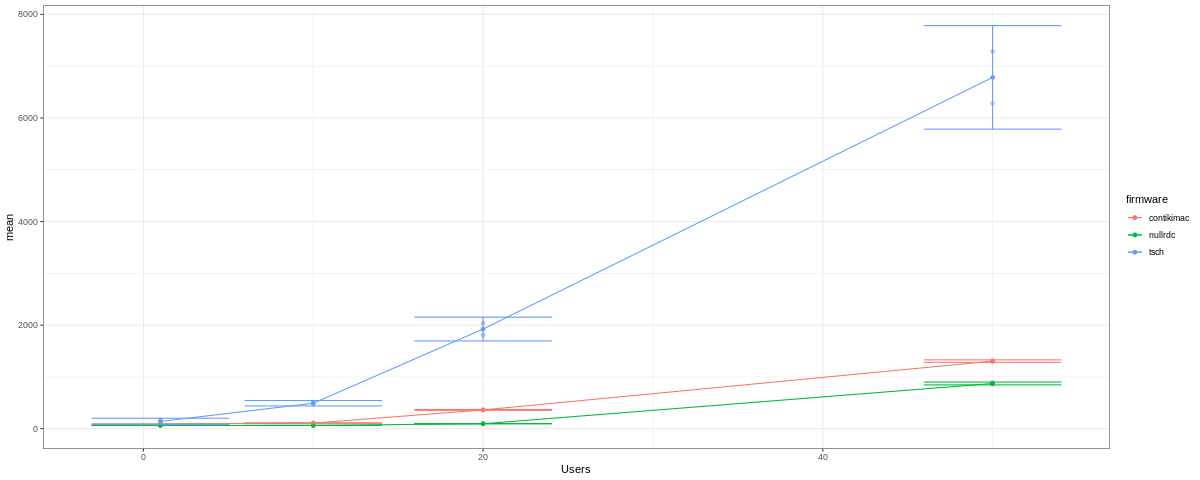

In [46]:
%%R -i out -w 1200
library(dplyr)
library(ggplot2)

out %>% filter(Name == "Aggregated") %>% group_by(firmware, users) %>% summarize(mean = mean(`Average Response Time`), sd = sd(`Average Response Time`), se = sd/sqrt(n())) %>%
ggplot(aes(users, mean, color=firmware)) + geom_point() + geom_line() +
    geom_point(data=out[out$Name == "Aggregated",], aes(users, `Average Response Time`), alpha=.5) +
    geom_errorbar(aes(ymin=mean - 2*se, ymax= mean + 2*se)) +
    xlab("Users") + ylim(0, NA) + theme_bw()
   # facet_wrap(~firmware, scales="free")

#### Response time ($R$) against $\lambda$ (observed)


`summarise()` has grouped output by 'firmware'. You can override using the `.groups` argument.


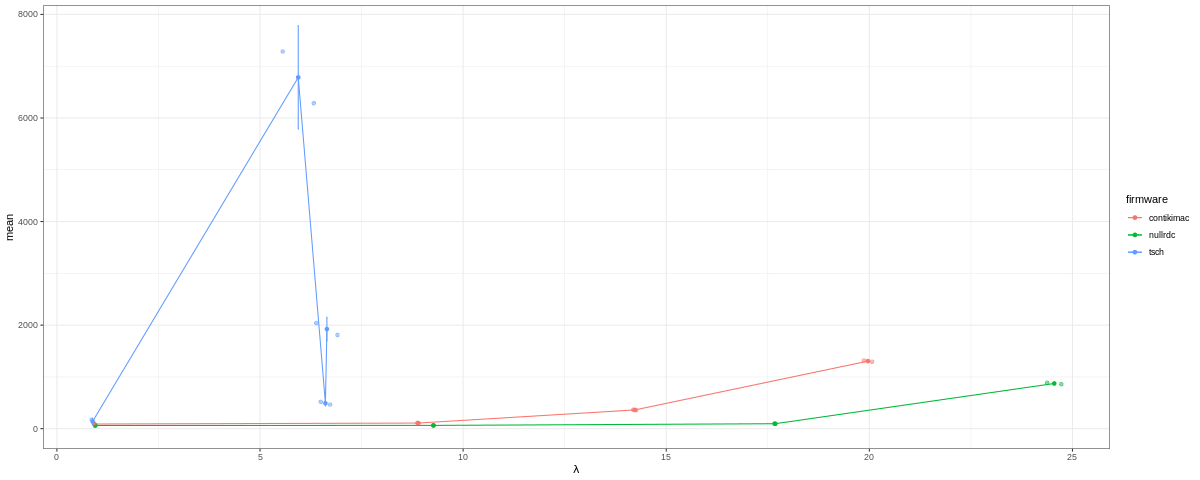

In [47]:
%%R -i out -w 1200
library(dplyr)
library(ggplot2)

out %>% filter(Name == "Aggregated") %>% group_by(firmware, users) %>% summarize(lambda = mean(`Requests/s`), mean = mean(`Average Response Time`), sd = sd(`Average Response Time`), se = sd/sqrt(n())) %>%
ggplot(aes(lambda, mean, color=firmware)) + geom_point() + geom_line() +
    geom_point(data=out[out$Name == "Aggregated",], aes(`Requests/s`, `Average Response Time`), alpha=.5) +
    geom_errorbar(aes(ymin=mean - 2*se, ymax= mean + 2*se)) +
    xlab(expression(lambda)) + ylim(0, NA) + theme_bw()
   # facet_wrap(~firmware, scales="free")

#### $1/R$ against $\lambda$

`summarise()` has grouped output by 'firmware'. You can override using the `.groups` argument.


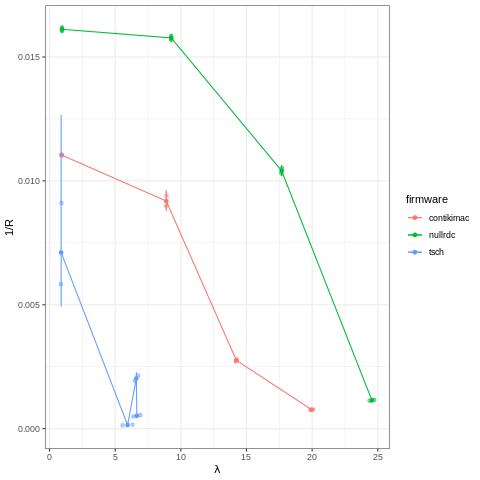

In [48]:
%%R -i out

out %>% filter(Name == "Aggregated") %>% group_by(firmware, users) %>% summarize(lambda = mean(`Requests/s`), mean = mean(`Average Response Time`), sd = sd(`Average Response Time`), se = sd/sqrt(n())) %>%
ggplot(aes(lambda, 1/mean, color=firmware)) + geom_point() + geom_line() +
    geom_point(data=out[out$Name == "Aggregated",], aes(`Requests/s`, 1/`Average Response Time`), alpha=.5) +
    geom_errorbar(aes(ymin=1/(mean - 2*se), ymax=1/(mean + 2*se))) +
    ylab(expression("1/R")) + xlab(expression(lambda)) + ylim(0, NA) + theme_bw()

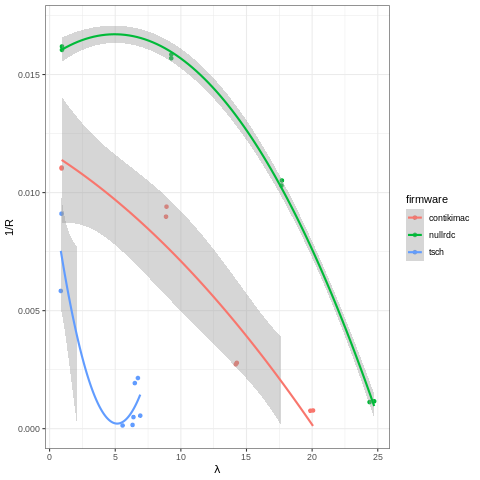

In [49]:
%%R -i out

out %>% filter(Name == "Aggregated") %>% group_by(firmware) %>%
ggplot(aes(`Requests/s`, 1/`Average Response Time`, color=firmware)) + geom_point() +
    geom_smooth(method="lm", formula="y~poly(x,2)") +
    ylab(expression("1/R")) + xlab(expression(lambda)) + ylim(0, NA) + theme_bw()

### 1/R - Models

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ tibble  3.1.4     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



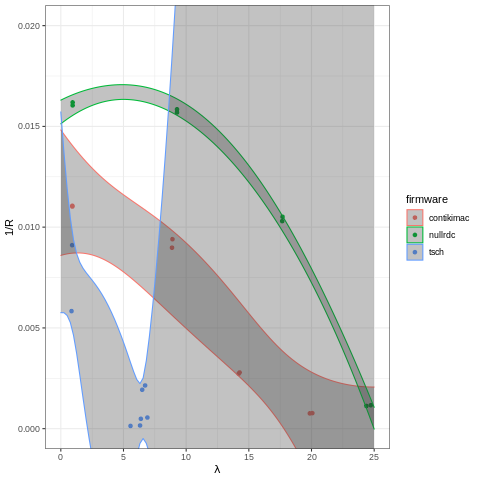

In [50]:
%%R -i out

library(broom)
library(dplyr)
library(tidyverse)

pred_df = data.frame("Requests/s"=seq(from=0,to=25, length.out=100))
names(pred_df) = c("Requests/s") # :(

models = out %>% filter(Name == "Aggregated") %>% group_by(firmware) %>%
  do(model = augment(x=lm("1/`Average Response Time` ~ poly(`Requests/s`, 2)", data = .), newdata = pred_df, type.predict = "response", interval="confidence")) %>%
    unnest(model)

#models = models[models$.lower>0,] # remove negative points, we don't have negative response times...


out %>% filter(Name == "Aggregated") %>% group_by(firmware) %>%
ggplot(aes(`Requests/s`, 1/`Average Response Time`, color=firmware)) + geom_point() +
    geom_ribbon(data = models, aes(ymin=.lower, ymax=.upper, y=.fitted, color=firmware), alpha=.3) +
    ylab(expression("1/R")) + xlab(expression(lambda)) + coord_cartesian(ylim=c(0,0.02)) + theme_bw()



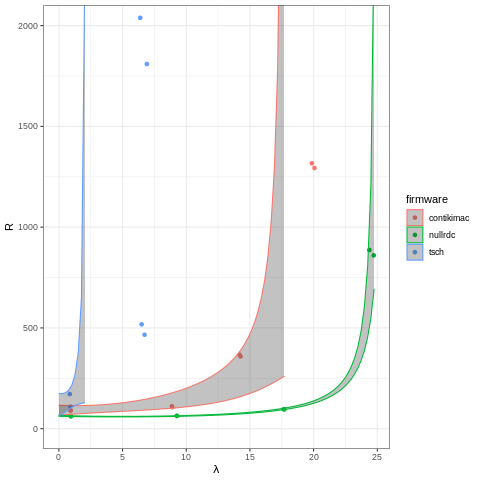

In [55]:
%%R -i out

models = models[models$.lower>0,] # remove negative points, we don't have negative response times...

out %>% filter(Name == "Aggregated") %>% group_by(firmware) %>%
ggplot(aes(`Requests/s`, `Average Response Time`, color=firmware)) + geom_point() +
    geom_ribbon(data = models, aes(ymin=1/.lower, ymax=1/.upper, y=1/.fitted, color=firmware), alpha=.3) +
    ylab(expression("R")) + xlab(expression(lambda)) + coord_cartesian(ylim=c(0,2000)) + 
#    geom_smooth(method="lm", formula="y~poly(x,2)") +
    theme_bw()